<a href="https://colab.research.google.com/github/liirusuk/llm_train/blob/main/Week_4_practice_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient flow

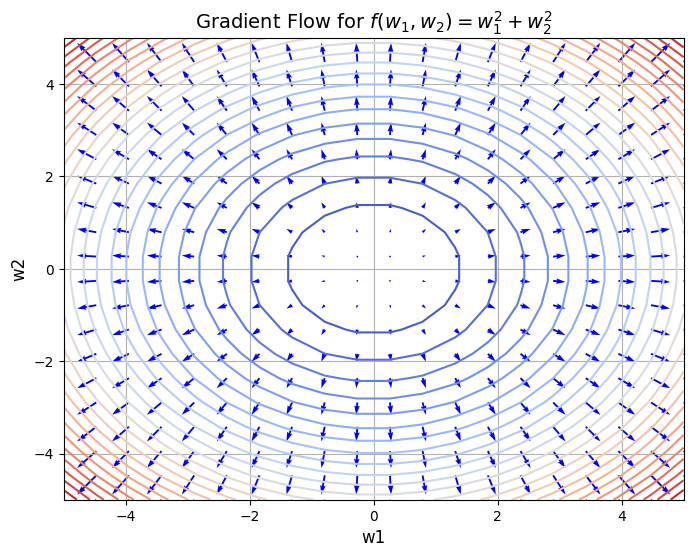

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def function(w1, w2):
    return w1**2 + w2**2

# Compute the gradient of the function
def gradient(w1, w2):
    df_dw1 = 2 * w1  # Partial derivative w.r.t. w1
    df_dw2 = 2 * w2  # Partial derivative w.r.t. w2
    return np.array([df_dw1, df_dw2])

# Create a grid of points
w1_values = np.linspace(-5, 5, 20)
w2_values = np.linspace(-5, 5, 20)
W1, W2 = np.meshgrid(w1_values, w2_values)

# Compute the function value at each point on the grid
Z = function(W1, W2)

# Compute the gradient at each point on the grid
U, V = np.zeros(W1.shape), np.zeros(W1.shape)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        grad = gradient(W1[i, j], W2[i, j])
        U[i, j] = grad[0]
        V[i, j] = grad[1]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the function contours
plt.contour(W1, W2, Z, levels=30, cmap='coolwarm')

# Plot the gradient field (using quiver for arrows)
plt.quiver(W1, W2, U, V, color='blue')

# Set axis labels and title
plt.xlabel('w1', fontsize=12)
plt.ylabel('w2', fontsize=12)
plt.title('Gradient Flow for $f(w_1, w_2) = w_1^2 + w_2^2$', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

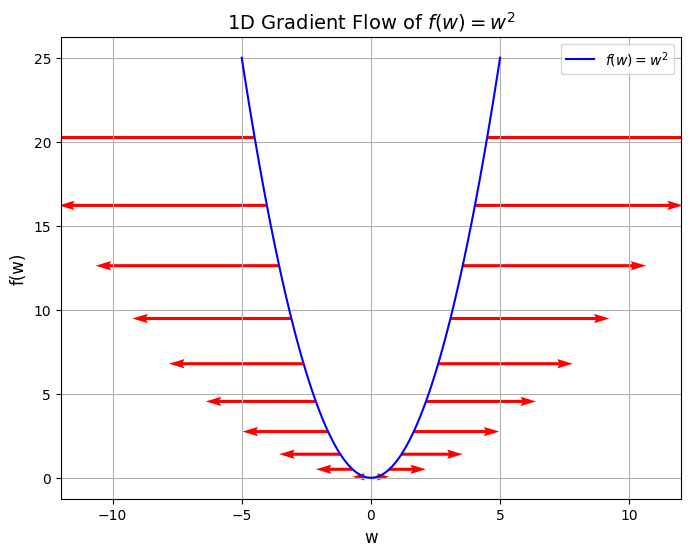

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def function(w):
    return w**2

# Compute the gradient (derivative) of the function
def gradient(w):
    return 2 * w  #

# Create a range of x values
w_values = np.linspace(-5, 5, 100)

# Compute the function values and gradients at each x value
z_values = function(w_values)
gradients = gradient(w_values)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the function f(x) = x^2
plt.plot(w_values, z_values, label='$f(w) = w^2$', color='blue')

# Plot the gradient arrows
# Choose a few points to visualize the gradient flow
w_points = np.linspace(-4.5, 4.5, 20)
z_points = function(w_points)
gradient_vectors = gradient(w_points)

# Plot the arrows showing the gradient direction
plt.quiver(w_points, z_points, gradient_vectors, np.zeros_like(gradient_vectors),
           color='red', angles='xy', scale_units='xy', scale=1, width=0.005)

# Set axis labels and title
plt.xlabel('w', fontsize=12)
plt.ylabel('f(w)', fontsize=12)
plt.title('1D Gradient Flow of $f(w) = w^2$', fontsize=14)
plt.xlim([-12,12])

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Gradient descent illustrations

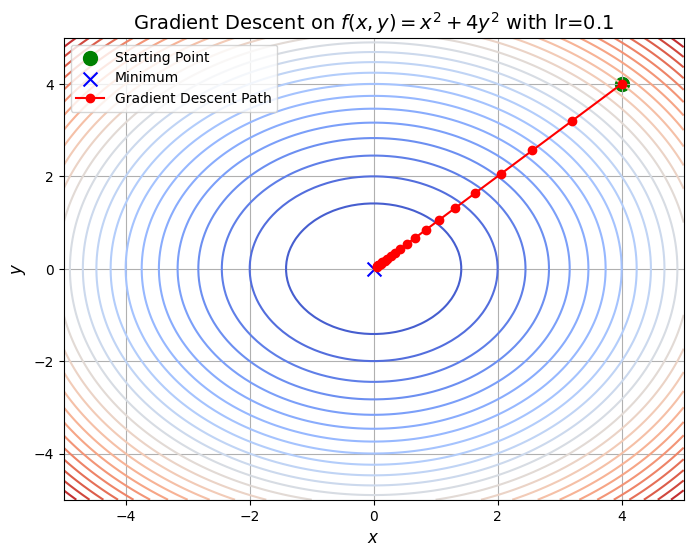

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Define the 2D function to minimize (a simple paraboloid)
def function(x, y):
    return x**2 + y**2

# Compute the gradient of the function
def gradient(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# Gradient descent parameters
learning_rate = 0.1
n_iterations = 20

# Initialize a starting point for the gradient descent
initial_point = np.array([4.0, 4.0])  # Starting at (4, 4)

# List to store the points during the descent
points = [initial_point]

# Perform gradient descent
for i in range(n_iterations):
    current_point = points[-1]
    grad = gradient(current_point[0], current_point[1])
    new_point = current_point - learning_rate * grad  # Update rule
    points.append(new_point)

# Convert the points to a numpy array for easier plotting
points = np.array(points)

# Create a grid of points to evaluate the function for contour plotting
x_values = np.linspace(-5, 5, 100)
y_values = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = function(X, Y)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the contour of the function
contour = ax.contour(X, Y, Z, levels=30, cmap='coolwarm')

# Plot the starting point and the minimum
ax.scatter(initial_point[0], initial_point[1], color='green', marker='o', label='Starting Point', s=100)
ax.scatter(0, 0, color='blue', marker='x', label='Minimum', s=100)

# Create an empty line for the path of gradient descent
path, = ax.plot([], [], 'ro-', label='Gradient Descent Path')

# Set axis labels and title
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.set_title(f'Gradient Descent on $f(x, y) = x^2 + 4y^2$ with lr={learning_rate}', fontsize=14)

# Add a legend
ax.legend()

# Set axis limits
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# Animation function
def update(frame):
    path.set_data(points[:frame+1, 0], points[:frame+1, 1])
    return path,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(points), interval=200, blit=True, repeat=False)

# Show the animation
plt.grid(True)

# Save the animation as a gif
ani.save(f'gradient_descent.gif', writer='pillow', fps=5)

# Display the plot (this will show a static image in some environments)
plt.show()

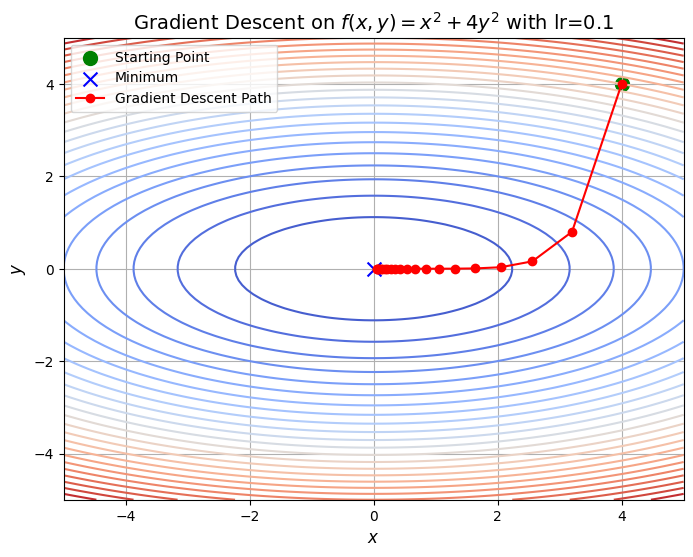

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Define the 2D function to minimize (a simple paraboloid)
def function(x, y):
    return x**2 + 4*y**2

# Compute the gradient of the function
def gradient(x, y):
    df_dx = 2 * x
    df_dy = 8 * y
    return np.array([df_dx, df_dy])

# Gradient descent parameters
learning_rate = 0.1
n_iterations = 20

# Initialize a starting point for the gradient descent
initial_point = np.array([4.0, 4.0])  # Starting at (4, 4)

# List to store the points during the descent
points = [initial_point]

# Perform gradient descent
for i in range(n_iterations):
    current_point = points[-1]
    grad = gradient(current_point[0], current_point[1])
    new_point = current_point - learning_rate * grad  # Update rule
    points.append(new_point)

# Convert the points to a numpy array for easier plotting
points = np.array(points)

# Create a grid of points to evaluate the function for contour plotting
x_values = np.linspace(-5, 5, 100)
y_values = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = function(X, Y)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the contour of the function
contour = ax.contour(X, Y, Z, levels=30, cmap='coolwarm')

# Plot the starting point and the minimum
ax.scatter(initial_point[0], initial_point[1], color='green', marker='o', label='Starting Point', s=100)
ax.scatter(0, 0, color='blue', marker='x', label='Minimum', s=100)

# Create an empty line for the path of gradient descent
path, = ax.plot([], [], 'ro-', label='Gradient Descent Path')

# Set axis labels and title
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.set_title(f'Gradient Descent on $f(x, y) = x^2 + 4y^2$ with lr={learning_rate}', fontsize=14)

# Add a legend
ax.legend()

# Set axis limits
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

# Animation function
def update(frame):
    path.set_data(points[:frame+1, 0], points[:frame+1, 1])
    return path,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(points), interval=200, blit=True, repeat=False)

# Show the animation
plt.grid(True)

# Save the animation as a gif
ani.save(f'gradient_descent_lr_{learning_rate}.gif', writer='pillow', fps=5)

# Display the plot (this will show a static image in some environments)
plt.show()

# Doing it with pytorch and autodiff

Let's start with a simple example of autodiff with pytorch.
The main units of Pytorch are **tensors**, which are vectors, matrices and higher-dimensional boxes filled with numbers. In addition to the numbers themselves, a tensor also has:

* `required_grad` property. If it's true, we can differentiate by the elements of this tensor.
* `grad` attribute which will contain the gradient by this tensor as soon as we compute it.

**An important thing**: In a computational graph, Pytorch will by default refuse to compute gradients of non-leaf vertices.

In [ ]:
import torch

x = torch.tensor([1.0], requires_grad=True)
z = torch.tensor([2.0], requires_grad=True)

# f(x, z) = sin(xz)^2, (x_0, z_0) = (1, 2)
h1 = x * z
h2 = h1**2
y = torch.sin(h2)

# starts from y and goes in-depth, finding gradients
# y should be a scalar!
y.backward()

print(x.grad)
print(z.grad)
print(h1.grad)

tensor([-5.2291])
tensor([-2.6146])
None


<ipython-input-29-ee5e295d2d1b>:17: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(h1.grad)


Let's compare the result with the honest derivative by w:

In [ ]:
# True derivative by w:
torch.cos((x*z)**2)*(2*x*z)*z

tensor([-5.2291], grad_fn=<MulBackward0>)

Now, an example with matrices:

In [ ]:
import torch

X = torch.tensor([[1.0, 1.1],[2.0, 2.1],[3.0, 3.1]], requires_grad=False)
Y = torch.tensor([[2.],[4.],[6.]], requires_grad=False)
W = torch.tensor([[3, 4.]], requires_grad=True)

# ||Y - XW^T||^2
error = Y - torch.mm(X, W.T)
loss = torch.mm(error.T, error)

loss.backward()

print(W.grad)

tensor([[144.8000, 151.0400]])


Let's rewrite the gradient descent function with Pytorch to get rid of manual differentiation.

In [ ]:
import torch
import numpy as np


def run_gd_pytorch(function, initial_point=np.array([4.0, 4.0]),
                   learning_rate=0.1, n_iterations=20):
    # Initialize a starting point for the gradient descent
    torch.manual_seed(0)  # for reproducibility

    current_w = torch.tensor(initial_point, requires_grad=True)

    # List to store the points during the descent
    points = [initial_point]

    # Perform gradient descent
    for i in range(n_iterations):
        # Forward pass: compute the function value
        y = function(current_w)

        # Backward pass: compute the gradient
        y.backward()

        # Update the points
        with torch.no_grad():
            current_w -= learning_rate * current_w.grad

        # Store the new points
        points.append(current_w.clone().detach().numpy())

        # Zero the gradients for the next iteration
        # Without this, Pytorch will be accumulating gradients
        current_w.grad.zero_()

    # Convert the points to a numpy array for easier plotting
    points = np.stack(points, axis=0)

    return points

The following function creates a gradient descent animation for us:

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

def animate_gd(function, points, plot_title='Gradient Descent visualization',
               true_minimum=(0,0)):
    # Create a grid of points to evaluate the function for contour plotting
    x_values = np.linspace(-5, 5, 100)
    y_values = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_values, y_values)
    Z = function(torch.tensor(np.stack((X, Y), axis=-1).reshape(100*100,2))).numpy().reshape(100,100)

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the contour of the function
    contour = ax.contour(X, Y, Z, levels=30, cmap='coolwarm')

    # Plot the starting point and the minimum
    ax.scatter(points[0][0], points[0][1], color='green', marker='o', label='Starting Point', s=100)
    ax.scatter(true_minimum[0], true_minimum[1], color='blue', marker='x', label='Minimum', s=100)

    # Create an empty line for the path of gradient descent
    path, = ax.plot([], [], 'ro-', label='Gradient Descent Path')

    # Set axis labels and title
    ax.set_xlabel('$x$', fontsize=12)
    ax.set_ylabel('$y$', fontsize=12)
    ax.set_title(plot_title, fontsize=14)

    # Add a legend
    ax.legend()

    # Set axis limits
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])

    # Animation function
    def update(frame):
        path.set_data(points[:frame+1, 0], points[:frame+1, 1])
        return path,

    # Create the animation
    ani = FuncAnimation(fig, update, frames=len(points), interval=200, blit=True, repeat=False)

    # Show the animation
    plt.grid(True)

    # Save the animation as a gif
    ani.save(f'gradient_descent.gif', writer='pillow', fps=5)

    # Display the plot (this will show a static image in some environments)
    plt.show()

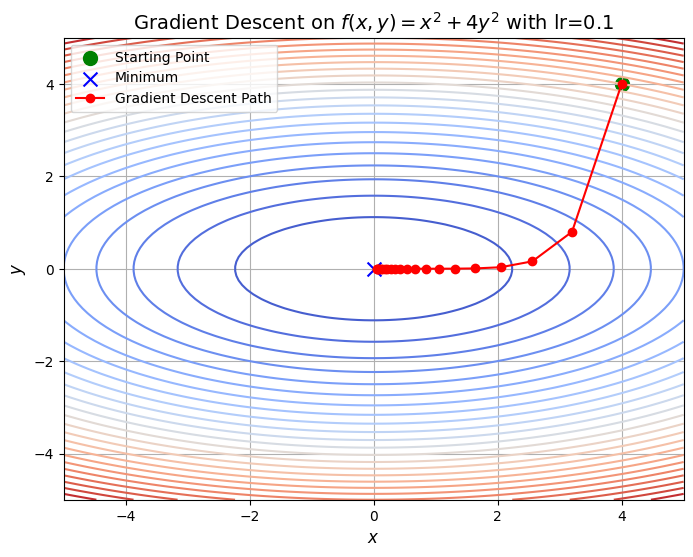

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


# Function coefs_1 * w_1**2 + coefs_2 * w_2**2
coefs_torch = torch.tensor([1.0, 4.0], requires_grad=False, dtype=torch.float64)
def function(w):
    return torch.matmul(w**2, coefs_torch)

learning_rate = 0.1
n_iterations = 20

points = run_gd_pytorch(function, learning_rate=learning_rate, n_iterations=n_iterations)

animate_gd(function, points,
           plot_title=f'Gradient Descent on $f(x, y) = x^2 + 4y^2$ with lr={learning_rate}')

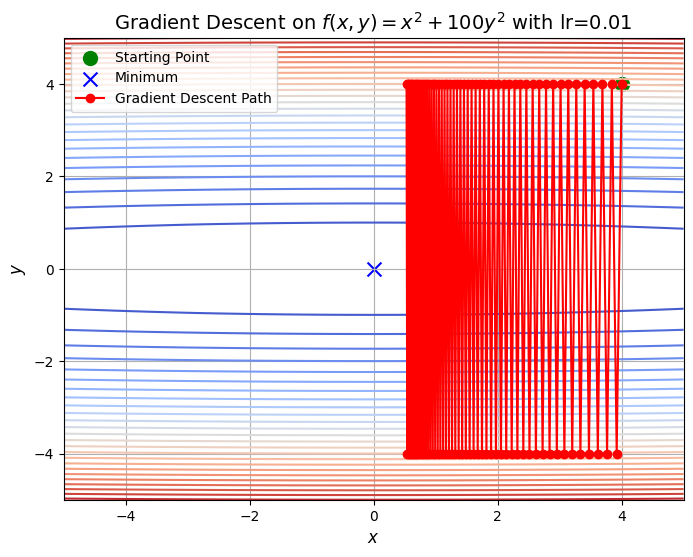

In [ ]:
coefs_torch = torch.tensor([1.0, 100.0], requires_grad=False, dtype=torch.float64)
def function(w):
    return torch.matmul(w**2, coefs_torch)

learning_rate = 0.01
n_iterations = 100
points = run_gd_pytorch(function, learning_rate=learning_rate, n_iterations=n_iterations)

animate_gd(function, points,
           plot_title=f'Gradient Descent on $f(x, y) = x^2 + 100y^2$ with lr={learning_rate}')

Ackley function:

$$f(x,y)=-20\exp \left[-0.2{\sqrt{0.5\left(x^{2} + y^{2}\right)}}\right]- \exp\left[ 0.5 ( \cos{2\pi x} + \cos{2\pi y}) \right]$$

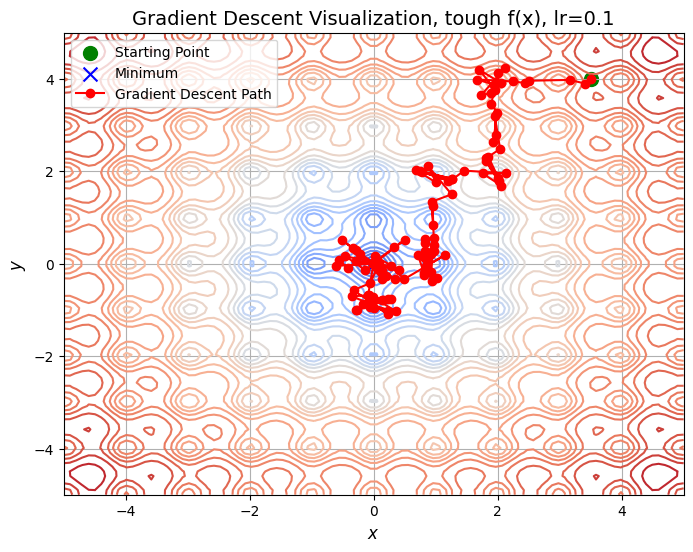

In [ ]:
def tough_function(w):
    return (
            -20*torch.exp(-0.2*torch.sqrt((0.5*w**2).sum(axis=-1)))
            - torch.exp(0.5*(torch.cos(2*np.pi*w[...,0]) + torch.cos(2*np.pi*w[...,1])))
            + np.e + 20
    )

learning_rate = 0.1
n_iterations = 100
initial_point = np.array([3.5, 4.0])
points = run_gd_pytorch(tough_function, initial_point=initial_point,
                        learning_rate=learning_rate, n_iterations=n_iterations)

animate_gd(tough_function, points,
           plot_title=f'Gradient Descent Visualization, tough f(x), lr={learning_rate}')

# GD and SGD for linear regression

We'll take a linear regression model $y\sim x_1w_1 + x_2w_2$.

<ipython-input-5-791f44bd7b7b>:14: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  y = X @ w_true.T + torch.randn(size=(n_points,))*0.5


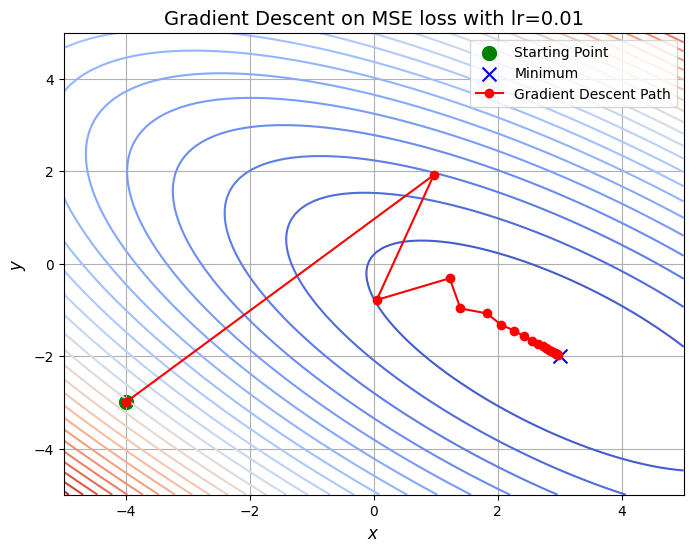

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

w_true = torch.tensor([3., -2.], dtype=torch.float64)

n_points = 200
x_base = torch.rand(size=(n_points,1), dtype=torch.float64)*10
X = torch.concat(
    (x_base, x_base + torch.randn(size=(n_points, 1))*5),
    axis=1)
y = X @ w_true.T + torch.randn(size=(n_points,))*0.5

def function(w):
    if len(w.shape) == 1:
        return ((torch.matmul(X, w.T) - y)**2).mean(axis=0)
    else:
        return ((torch.matmul(X, w.T) - y.unsqueeze(-1))**2).mean(axis=0)

learning_rate = 0.01
n_iterations = 20
points = run_gd_pytorch(function,  initial_point=np.array([-4.0, -3.0]),
                        learning_rate=learning_rate, n_iterations=n_iterations)

animate_gd(function, points,
           plot_title=f'Gradient Descent on MSE loss with lr={learning_rate}',
           true_minimum=w_true.detach().numpy())

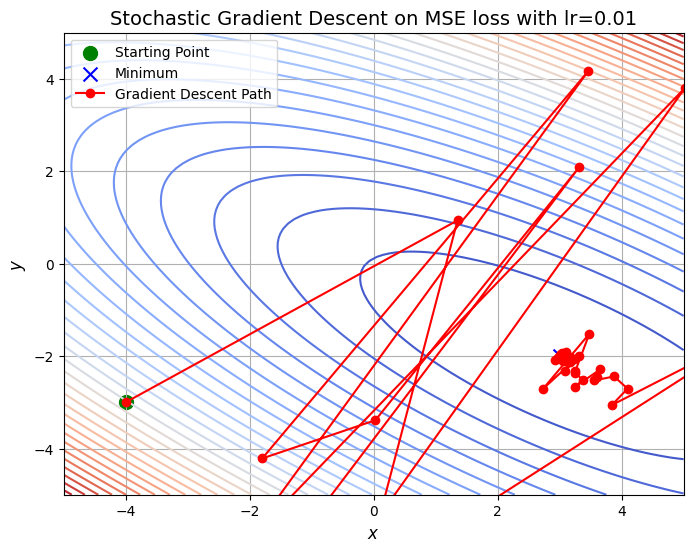

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

w_true = torch.tensor([3., -2.], dtype=torch.float64)

n_points = 200
x_base = torch.rand(size=(n_points,1), dtype=torch.float64)*10
X = torch.concat(
    (x_base, x_base + torch.randn(size=(n_points, 1))*5),
    axis=1)
y = X @ w_true.T + torch.randn(size=(n_points,))*0.5

batch_size = 4

def function_sgd(w):
    batch_indices = np.random.choice(n_points, batch_size)
    if len(w.shape) == 1:
        return ((torch.matmul(X[batch_indices,:], w.T) - y[batch_indices])**2).mean(axis=0)
    else:
        return ((torch.matmul(X[batch_indices,:], w.T) - y[batch_indices].unsqueeze(-1))**2).mean(axis=0)

learning_rate = 0.01
n_iterations = 1 * (n_points//batch_size) # potentially to use as much data
points = run_gd_pytorch(function_sgd, initial_point=np.array([-4.0, -3.0]),
                        learning_rate=learning_rate, n_iterations=n_iterations)

animate_gd(function, points,
           plot_title=f'Stochastic Gradient Descent on MSE loss with lr={learning_rate}',
           true_minimum=w_true.detach().numpy())

# How to SGD this with Pytorch in a convenient way

In [ ]:
import torch

# Generate random data
n_samples, n_features = 200, 5
X = torch.randn(n_samples, n_features)
w_true = torch.randn(1, n_features) * 5 # True weights
b_true = torch.tensor(-1) # True bias
y = X @ w_true.T + b_true + 0.01 * torch.randn(n_samples, 1)

# Initialize weights and bias
w = torch.randn(1, n_features, requires_grad=True)  # Weight vector
b = torch.randn(1, requires_grad=True)              # Bias scalar

# Define optimizer
# Show explicitly which parameters you want it to optimize
# lr is the learning rate
# This is instead of current_w -= learning_rate * current_w.grad
optimizer = torch.optim.SGD([w, b], lr=0.1)  # Stochastic Gradient Descent

# Training loop
n_epochs = 5
batch_size = 20

# Training loop
for i in range(n_epochs):
    # Shuffle the data at the beginning of each epoch
    perm = torch.randperm(n_samples)

    # Mini-batch training
    for start_idx in range(0, n_samples, batch_size):
        end_idx = start_idx + batch_size
        X_batch = X[perm[start_idx:end_idx]]
        y_batch = y[perm[start_idx:end_idx]]

        # Forward pass: compute predicted y
        y_pred = X_batch @ w.T + b

        # Compute the loss (Mean Squared Error)
        loss = torch.mean((y_pred - y_batch) ** 2)

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass: compute gradients
        # After that, w and b contain their gradients
        loss.backward()

        # Update weights and bias using the optimizer
        optimizer.step()

    # Optionally print the loss after every epoch
    train_loss = torch.mean((X @ w.T + b - y) ** 2)
    print(f'Epoch {i}, Loss: {train_loss.item()}')

# Final values
print(f'\nTrue weight: {w_true.detach().numpy()}')
print(f'True bias: {b_true.detach().numpy()}')

print(f'\nLearned weight: {w.detach().numpy()}')
print(f'Learned bias: {b.detach().numpy()}')

Epoch 0, Loss: 1.0143333673477173
Epoch 1, Loss: 0.013263184577226639
Epoch 2, Loss: 0.0002705506922211498
Epoch 3, Loss: 8.736295421840623e-05
Epoch 4, Loss: 8.372699085157365e-05

True weight: [[-7.3650813  1.8966444 -1.3147256  7.420256  -1.4536843]]
True bias: -1

Learned weight: [[-7.365174   1.895886  -1.3134463  7.4211493 -1.4530134]]
Learned bias: [-0.99962276]


# Regularization

Let's illustrate how L1 regularization sparsifies weights using the Australian rain dataset. The regularization strength is controlled by the `C` parameter of `LogisticRegression(C=...)`. The tricky thing is that **the smaller `C` is, the stronger the regularization** (`C` is smth like $1/\lambda$).

We set `C=0.01`, which is a moderatly strong regularization.

In [ ]:
!gdown 1oDLRJgsOl_s_5FTbmL0XASp0-glW697E # download weatherAUS.csv

Downloading...
From: https://drive.google.com/uc?id=1oDLRJgsOl_s_5FTbmL0XASp0-glW697E
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 46.4MB/s]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load dataset

df = pd.read_csv('weatherAUS.csv')
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Drop rows with any NaN values
df = df.dropna()

# Drop unused columns
X = df.drop(columns=['RainTomorrow', 'Date'])
y = df['RainTomorrow']

# Split the data
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_and_val, y_train_and_val, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define the preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline that includes preprocessing and the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression(
                             solver='liblinear',
                             penalty='l1',
                             C=0.01))])

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)
y_scores = model.predict_proba(X_val)[:,1]

# Evaluation
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_scores)

# Write results
print(f'f1_score:{f1}')
print(f'auc_roc_score:{roc_auc}')
with open('results.csv', 'w') as f:
    f.write(f'f1_score:{f1}\n')
    f.write(f'auc_roc_score:{roc_auc}')


f1_score:0.5969636207390433
auc_roc_score:0.8786402026194677


Now, let's see which weights correspond to different features. Unfortunately, we'll need this ugly code, becase it's not so easy with pipelines :(

In [ ]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    feature_names = []

    for name, pipe, features in column_transformer.transformers_:
        if name == "num":
            feature_names.extend(features.tolist())
        elif name == "cat":
            # Get feature names for categorical variables after one-hot encoding
            encoder = pipe.named_steps['onehot']
            # Get the categorical feature names
            cat_features = features.tolist()
            # Get all categories including the dropped one
            categories = encoder.categories_
            for cat_feature, category in zip(cat_features, categories):
                # Add all categories except the first one (dropped)
                feature_names.extend([f"{cat_feature}_{str(cat)}" for cat in category[1:]])

    return feature_names

# Get feature names after preprocessing
feature_names = get_feature_names(model.named_steps['preprocessor'])

# Get coefficients from the logistic regression model
coefficients = model.named_steps['classifier'].coef_[0]

print(feature_names)
print(len(feature_names), len(coefficients))

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Drop the absolute value column used for sorting
coef_df = coef_df.drop('Abs_Coefficient', axis=1)

# Print the coefficients
print("\nModel Coefficients (sorted by importance):")
print(" \t Feature \t Coefficient")
for i, row in coef_df.iterrows():
    print(f"{i}\t{row['Feature']}\t{row['Coefficient']}")

# Optionally, save to CSV
coef_df.to_csv('model_coefficients.csv', index=False)

# Print additional model information
print("\nIntercept:", model.named_steps['classifier'].intercept_[0])

# Print top positive and negative influences
print("\nTop 5 Positive Influences:")
print(coef_df[coef_df['Coefficient'] > 0].head())
print("\nTop 5 Negative Influences:")
print(coef_df[coef_df['Coefficient'] < 0].head())

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin', 'Location_Hobart', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown', 'Location_Woomera', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'Wind

As we see, only a small fraction of features survived, and we only lost 0.01-0.02 of F1 score compared to weaker regularization. This begs the question whether all these vanished features really bring that much value for us.

I'm also including here a code for tuning the $\lambda$ (or, more accurately, the `C`) hyperparameter using:

- grid search over a logarithmic grid,
- [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) as a way of evaluating the model quality.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select the parameter C values we want to check
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_scores = best_model.predict_proba(X_test)[:, 1]

# Evaluate the best model
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_scores)

print(f"f1_score: {f1}")
print(f"auc_roc_score: {roc_auc}")

# Write results (optional)
with open('results.csv', 'w') as f:
    f.write(f'f1_score:{f1}\n')
    f.write(f'auc_roc_score:{roc_auc}')

Best hyperparameters: {'classifier__C': 100}
Best F1 score: 0.6273238616974159
f1_score: 0.6363216266173752
auc_roc_score: 0.8889569260088317


In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093452,0.006875,0.020247,0.000615,0.001,{'classifier__C': 0.001},0.558800,0.537897,0.584349,0.570189,0.574016,0.565050,0.015847,6
1,0.138682,0.035327,0.019986,0.000299,0.010,{'classifier__C': 0.01},0.603511,0.593316,0.620309,0.603939,0.628280,0.609871,0.012630,5
2,0.315472,0.050164,0.021388,0.001250,0.100,{'classifier__C': 0.1},0.620015,0.607735,0.636001,0.625271,0.638929,0.625590,0.011281,4
3,0.581710,0.053204,0.020874,0.001714,1.000,{'classifier__C': 1},0.621934,0.609078,0.639510,0.625269,0.639451,0.627048,0.011501,3
4,0.754788,0.025302,0.019830,0.000550,10.000,{'classifier__C': 10},0.622607,0.609872,0.640490,0.623209,0.639711,0.627178,0.011580,2
5,0.779914,0.035932,0.020499,0.000490,100.000,{'classifier__C': 100},0.622607,0.610603,0.640979,0.623209,0.639220,0.627324,0.011373,1


# Dimension reduction

Here's some code for 2d visualization of elliptic data:

<ipython-input-21-712cec9a049d>:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal([0, 0], cov_matrix, n_points)


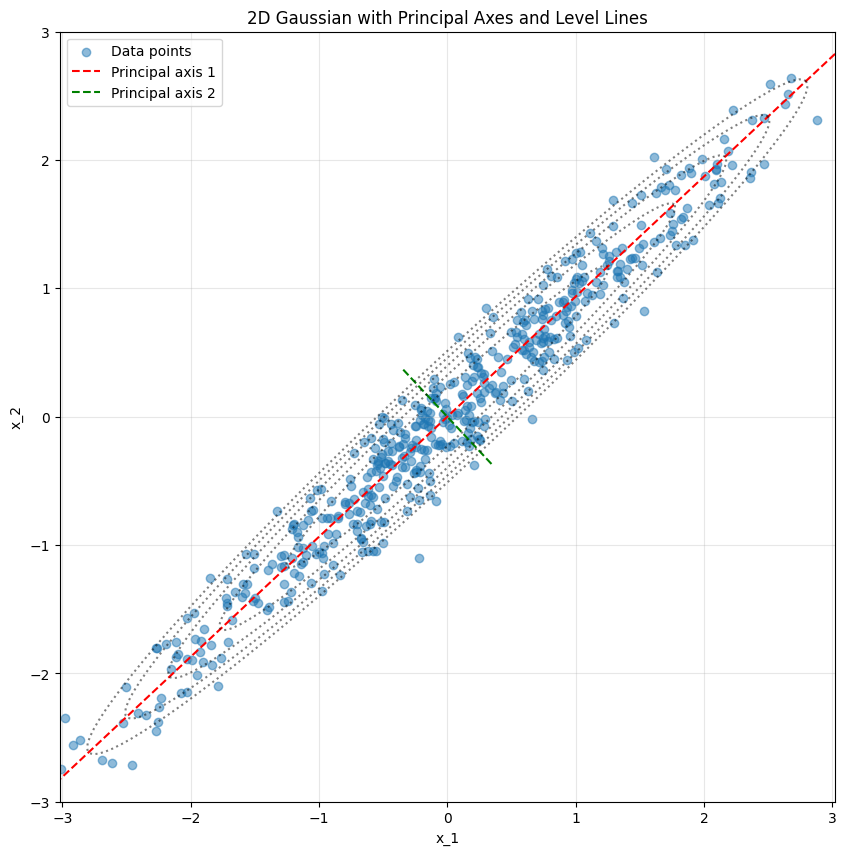

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set random seed for reproducibility
np.random.seed(42)

# Generate covariance matrix that will give us horizontal principal axis
cov_matrix = np.array([[2.0, 1.9],
                       [1.1, 1.0]])

# Generate data
n_points = 500
data = np.random.multivariate_normal([0, 0], cov_matrix, n_points)

# Calculate empirical mean and covariance
emp_mean = np.mean(data, axis=0)
emp_cov = np.cov(data.T)

# Perform PCA to get principal axes
pca = PCA()
pca.fit(data)

# Get principal components and eigenvalues
components = pca.components_
eigenvalues = pca.explained_variance_

# Create figure
plt.figure(figsize=(10, 10))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data points')

# Plot principal axes
colors = ['r', 'g']
for i, (component, eigenvalue) in enumerate(zip(components, eigenvalues)):
    # Scale the direction vector by the square root of eigenvalue
    scaled_component = component * np.sqrt(eigenvalue)

    # Plot the principal axis line (extended in both directions)
    plt.plot([-3*scaled_component[0], 3*scaled_component[0]],
             [-3*scaled_component[1], 3*scaled_component[1]],
             '--', color=colors[i],
             label=f'Principal axis {i+1}')

# Plot level lines of x^T Q^{-1} x = c
# These are ellipses with axes aligned with eigenvectors
def plot_level_line(c):
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.vstack([np.cos(theta), np.sin(theta)])

    # Transform circle using eigendecomposition
    ellipse = np.sqrt(c) * (components.T * np.sqrt(eigenvalues)) @ circle

    plt.plot(ellipse[0, :], ellipse[1, :], 'k:', alpha=0.5)

# Plot several level lines
for c in [1, 2, 3, 4, 5]:
    plot_level_line(c)

# Set equal aspect ratio and add grid
plt.axis('equal')
plt.grid(True, alpha=0.3)

# Add labels and title
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('2D Gaussian with Principal Axes and Level Lines')
plt.legend()

# Center the plot around (0,0) with some margin
margin = 4
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

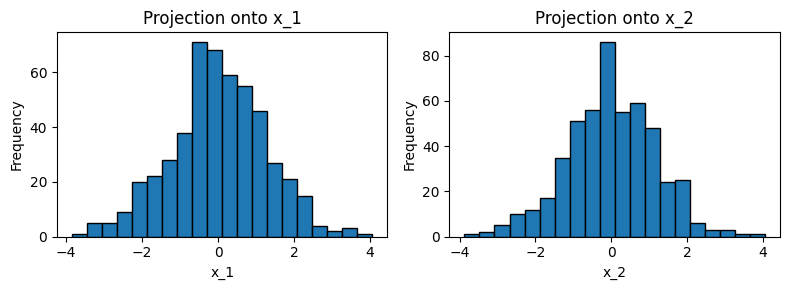

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))

# Histogram for x_1
plt.subplot(1, 2, 1)
plt.hist(data[:, 0], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Projection onto x_1')
plt.xlabel('x_1')
plt.ylabel('Frequency')


# Histogram for x_2
plt.subplot(1, 2, 2)
plt.hist(data[:, 1], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Projection onto x_2')
plt.xlabel('x_2')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Applying SVD to the Australian weather dataset

Before doing this, we need to apply the pipeline. I advice to do scaling before SVD, because otherwise you can get large features instead of important ones.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define the preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_std=True))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train_prep = preprocessor.fit_transform(X_train).toarray()
X_test_prep = preprocessor.transform(X_test).toarray()

Let's apply SVD to this dataset:

In [ ]:
from scipy.linalg import svd
import matplotlib.pyplot as plt
import numpy as np

U, S, Vt = svd(X_train_prep)

It's useful to look at the $\sigma_i$:

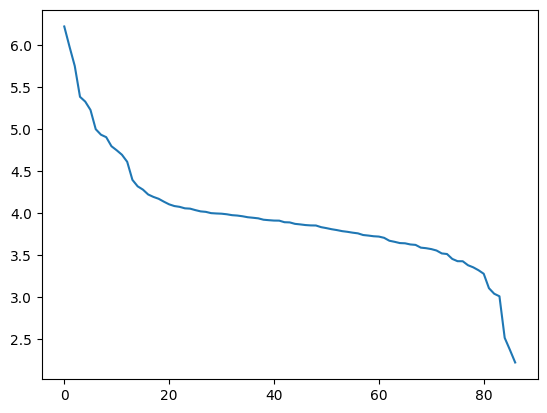

In [ ]:
plt.plot(np.log(S))

They don't quickly fall to zero, but still they exhibit steep decrease in the beginning. Let's check what happens with the metrics if we take only several first latent features. Of course, we'll need to scale these features using `with_std=True` before getting them into a linear model.

In [ ]:
from tqdm import tqdm

f1_scores_train = []
f1_scores_test = []
roc_auc_scores_train = []
roc_auc_scores_test = []

R_range = np.arange(1, X_train_prep.shape[1], 1)
for R in tqdm(R_range):
    X_train_new = U[:,:R] @ np.diag(S[:R])
    X_test_new = X_test_prep @ Vt.T[:,:R]

    scaler = StandardScaler(with_std=True)
    X_train_new = scaler.fit_transform(X_train_new)
    X_test_new = scaler.transform(X_test_new)

    model = LogisticRegression()
    model.fit(X_train_new, y_train)
    y_pred_train = model.predict(X_train_new)
    y_pred_test = model.predict(X_test_new)

    f1_scores_train.append(f1_score(y_train, y_pred_train))
    f1_scores_test.append(f1_score(y_test, y_pred_test))
    roc_auc_scores_train.append(roc_auc_score(y_train, y_pred_train))
    roc_auc_scores_test.append(roc_auc_score(y_test, y_pred_test))


100%|██████████| 86/86 [00:26<00:00,  3.25it/s]


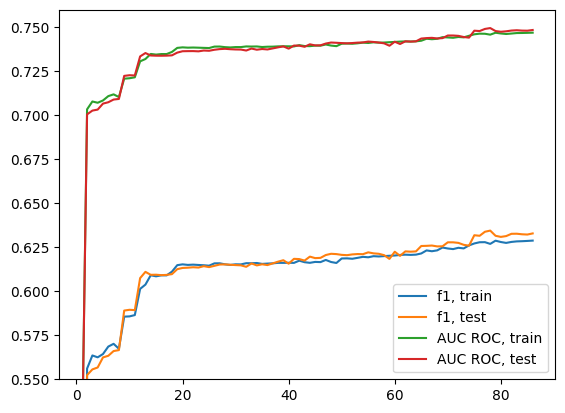

In [ ]:
plt.plot(R_range, f1_scores_train, label='f1, train')
plt.plot(R_range, f1_scores_test, label='f1, test')
plt.plot(R_range, roc_auc_scores_train, label='AUC ROC, train')
plt.plot(R_range, roc_auc_scores_test, label='AUC ROC, test')

plt.ylim([0.55, 0.76])
plt.legend()

As we see, the last 60 latent features only bring around 0.01-0.02 points of metrics.

Meanwhile, let's look at the first latent feature:

In [ ]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    feature_names = []

    for name, pipe, features in column_transformer.transformers_:
        if name == "num":
            feature_names.extend(features.tolist())
        elif name == "cat":
            # Get feature names for categorical variables after one-hot encoding
            encoder = pipe.named_steps['onehot']
            # Get the categorical feature names
            cat_features = features.tolist()
            # Get all categories including the dropped one
            categories = encoder.categories_
            for cat_feature, category in zip(cat_features, categories):
                # Add all categories except the first one (dropped)
                feature_names.extend([f"{cat_feature}_{str(cat)}" for cat in category[1:]])

    return feature_names

In [ ]:
feature_names = get_feature_names(preprocessor)

In [ ]:
for feature_name, coef in zip(feature_names, Vt[:,0]):
    print(f'{feature_name}: {coef}')

MinTemp: -0.2911913497218026
MaxTemp: -0.24521057873511337
Rainfall: 0.26235080739088684
Evaporation: -0.20211935909693893
Sunshine: 0.18948962046534998
WindGustSpeed: -0.21003880549144072
WindSpeed9am: 0.12966831534400333
WindSpeed3pm: -0.020240903207510128
Humidity9am: 0.0206615303734256
Humidity3pm: -0.08651436924120624
Pressure9am: 0.030232247719618147
Pressure3pm: -0.08648280234142441
Cloud9am: 0.0716851566348237
Cloud3pm: -0.26704260540708397
Temp9am: 0.016500657837586946
Temp3pm: -0.0736006120281856
Location_Brisbane: 0.15301483627360235
Location_Cairns: -0.16095484065719876
Location_Canberra: 0.45830432352270045
Location_Cobar: -0.04436536187615459
Location_CoffsHarbour: 0.1461692986710077
Location_Darwin: -0.021470526200439863
Location_Hobart: 0.047230106131236405
Location_Melbourne: 0.04717340220265818
Location_MelbourneAirport: -0.10297577328919941
Location_Mildura: -0.12040098977163632
Location_Moree: 0.07916328721026271
Location_MountGambier: -0.08737259503728272
Location_

In [ ]:
for feature_name, coef in zip(feature_names, Vt[:,1]):
    print(f'{feature_name}: {coef}')

MinTemp: -0.3904067420414702
MaxTemp: -0.011509744092218221
Rainfall: 0.1948738630287128
Evaporation: -0.08767247980191352
Sunshine: 0.046445927394636925
WindGustSpeed: -0.006785064784571946
WindSpeed9am: -0.10492732022139581
WindSpeed3pm: 0.19309772681576395
Humidity9am: 0.08380856903662809
Humidity3pm: 0.1830554677692821
Pressure9am: -0.01875395083948018
Pressure3pm: -0.06443048895061099
Cloud9am: -0.03322046725746948
Cloud3pm: 0.09743475348149039
Temp9am: -0.022660003767499423
Temp3pm: -0.015932268965591554
Location_Brisbane: -0.053971182774817175
Location_Cairns: 0.08885464394621505
Location_Canberra: -0.30546331098775603
Location_Cobar: 0.02592779284525975
Location_CoffsHarbour: -0.10768401610619116
Location_Darwin: -0.0004101333488665225
Location_Hobart: -0.009312162837830169
Location_Melbourne: 0.010851093226989532
Location_MelbourneAirport: 0.03684063752286575
Location_Mildura: 0.0790075528627339
Location_Moree: -0.05730361757586122
Location_MountGambier: 0.06198442269089992
Lo